# Open AI gym example
This code shows the use of open AI with chaos theory. Using to explore chaotic control of motors.

Code by Dexter R. Shepherd

### Section 1
Creating the open AI gym simulation

In [169]:
import sys
import gym
from gym import logger as gymlogger
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import random
from copy import deepcopy as dc
import math as maths

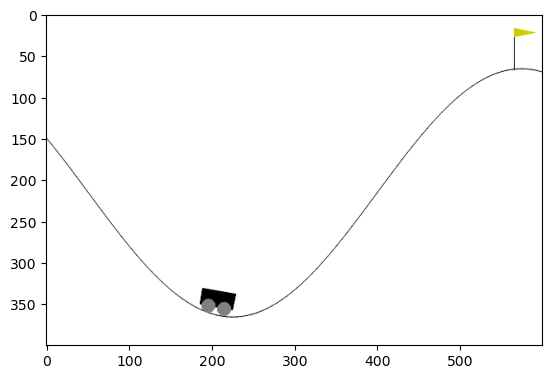

In [3]:
SIM='MountainCar-v0'

genotype=np.array([random.randint(0,2) for i in range(100)])
def run_trial(genotype,num_trials,show=True):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    observations=[]
    totalFit=-100
    best_obvs=[]
    for _ in range(num_trials):
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        rewards+=reward
        observations.append(fitness(observation))
        if terminated or truncated: #environment finished
            observation, info = env.reset()
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(observations) #copy obs
            observations=[]
    endObs=observation
    if show:
        return rewards,endObs,env.render()
    env.close()
    endObs=observation
    return rewards,best_obvs

def fitness(observation):
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

def visualise(genotype,num_trials):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    for _ in range(num_trials):
        #action = env.action_space.sample()
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action)
        rewards+=reward
        plt.imshow(env.render())
        plt.pause(0.05)
        if terminated or truncated:
            observation, info = env.reset()
    env.close()
    return rewards
def visualise_best(genotype,num_trials):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    observations=[]
    totalFit=-100
    best_obvs=dc(env.render())
    for _ in range(num_trials):
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        rewards+=reward
        observations.append(fitness(observation))
        if terminated or truncated: #environment finished
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(env.render()) #copy obs
            observation, info = env.reset()
            observations=[]
    endObs=observation
    env.close()
    endObs=observation
    return best_obvs

c=visualise_best(genotype,100)
plt.imshow(c)
plt.show()


### Section 2

Chaotic model

Using the Lorenze attractor we have oscilation movement with respect to time (T). 

$\dot{x} = \sigma (y-x)$

$\dot{y} = x ( \rho - z)-y$

$\dot{z} = xy - \beta z$

Three empty numpys of size n are used to store each iteration time step of the lorenze attractor.

$x \in \{0,...,n\},y \in \{0,...,n\},z \in \{0,...,n\}$

$\beta $ represents the geometry factor, aspect ratio of the box. The smaller it is, the more it fits within the sizing. 
$\sigma$ represents the prandtl number - ratio of momentum diffusing. 
$\rho$ represents the rayleigh number - dimentionaless numbe associated with buoyancy-driven flow. 

In 3D we have a chaotic model looking like the following:

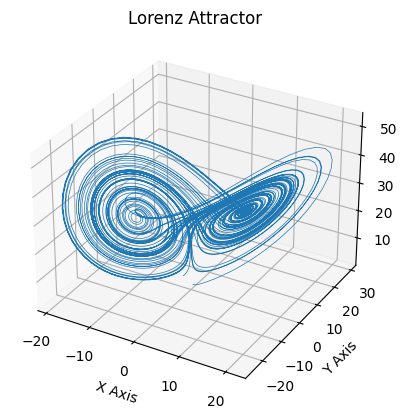

In [3]:
prandtl = 10 
rho = 28
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Plotting this as a 2D plot. By investigating the parameters, it is found that as $\rho < 1$ (0,0,0) is a unique state, but as $\rho > 1$ two steady states bifuricate from the source. This creating the values (for a 2D axis)
$(\pm \sqrt{\beta (\rho - 1)},\pm \sqrt{\beta (\rho - 1)}) $

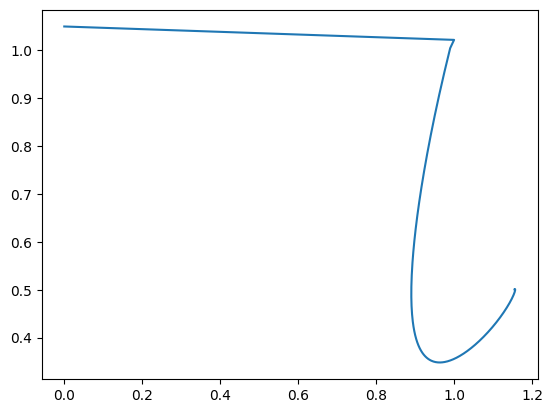

In [4]:
prandtl = 100
rho = 1.5
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
plt.plot(xs,zs)

plt.show()

Plotting this as the veloicities in each axis

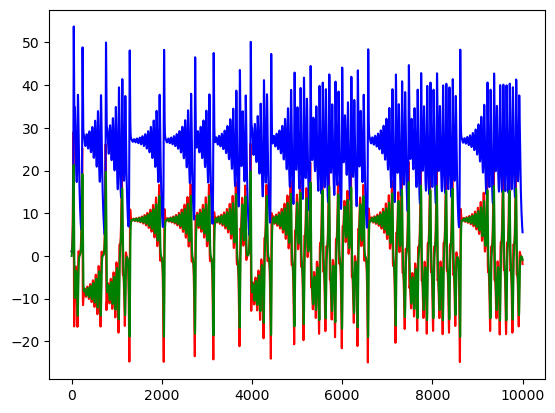

In [38]:
prandtl = 10
rho = 28
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot
def get_velocities(prandtl,rho,beta):
    dt = 0.01
    num_steps = 10000

    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs,ys,zs

xs,ys,zs=get_velocities(prandtl,rho,beta)
fig = plt.figure()
plt.plot(ys,c="r")
plt.plot(zs,c="b")
plt.plot(xs,c="g")
plt.show()

Converting the signal from velocities to the state actions of the open ai gym

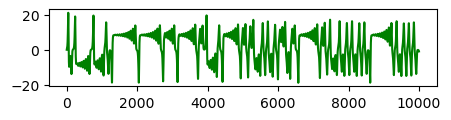

Convert to decision signal


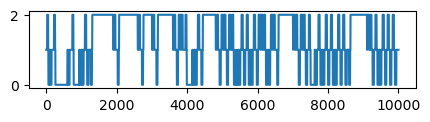

Convert to scale decision


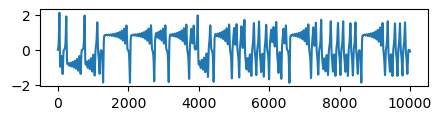

In [39]:
prandtl = 10
rho = 28
beta = 8/3

def convert(signal,val=5):
    #make threshold with val and create a signal based off of the chaotic one
    new=np.zeros(signal.shape)
    new[np.argwhere(signal<=(val*-1))]=0
    new[np.argwhere(signal>(val*-1))]=1
    new[np.argwhere(signal>val)]=2 #set by threshold
    return new

def convert_scale(signal,val=4,neg=True):
    #make threshold with val and create a signal based off of the chaotic one
    ma=np.max(signal)
    mi=0
    if neg:
        mi=np.min(signal)
    scaler=val/(ma+abs(mi)) #reduce by scaler
    return signal*scaler
xs,ys,zs=get_velocities(prandtl,rho,beta)

xs,ys,zs=get_velocities(prandtl,rho,beta)
fig = plt.figure(figsize=(5,1))
plt.plot(xs,c="g")
plt.show()
print("Convert to decision signal")
plt.figure(figsize=(5,1))
plt.plot(convert(xs,val=5))
plt.show()
print("Convert to scale decision")
plt.figure(figsize=(5,1))
plt.plot(convert_scale(xs,val=4))
plt.show()

## Section 3

Using the chaos signals to control the simulation. The first example makes use of a pre-generated signal with a grid-search method



Reward sum: -43.29050893610755


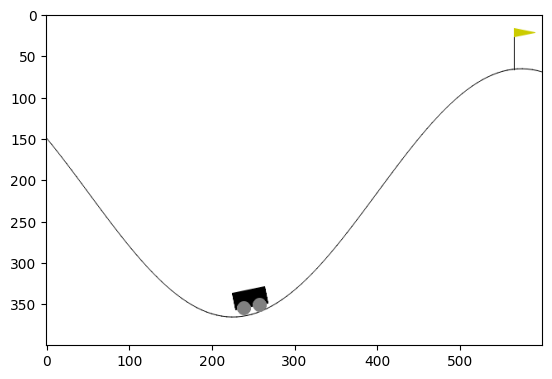

In [7]:
def fitness(observation): #get the fitness based on how far along the plane it is
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

prandtl = 10
rho = 28
beta = 8/3 
GEN=500
best=-100
best_chaotic=None
#loop through diffrent parameters
for rho in range(30):
    for prandtl in range(0,10):
        xs,ys,zs=get_velocities(prandtl,rho,beta) #gather the generated velocities from the chaotic parameters
        geno=convert(xs,val=5) #get in correct format
        reward,obs=run_trial(geno,GEN,show=False) #run a simulated trial
        reward=sum(obs)
        if reward>=best:
            best=reward
            best_chaotic=dc(geno) #deep copy the genotype
print("Reward sum:",best)
#reward=run_trial(best_chaotic,100)
im=visualise_best(best_chaotic,100)
plt.imshow(im)
plt.show()

## Section 4 

BVP signal

The equations are taken from the paper 'Response characteristics of the BVP neuron model to periodic pulse inputs'. This has been modiefied to have two parameters, c and a. c was already a paramter, but a was added to the y axis. 

$\ddot{x} = c(1-x^{2})(y-\frac{cx^{3}}{3}+cx)-x$

$\ddot{y} = -x\times a$

The secion of the equation $(y-\frac{cx^{3}}{3}+cx)$ can be written as $\dot{x}$ which is part of our lienard transformation.

[]

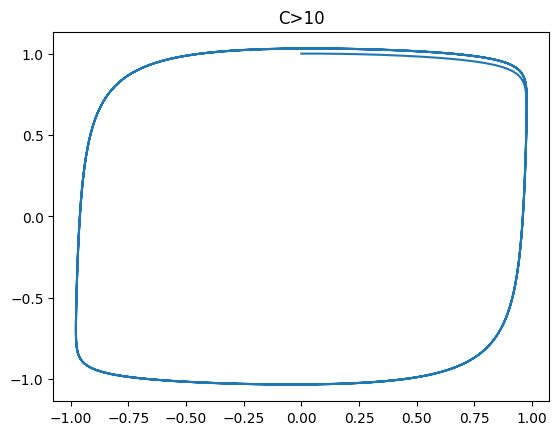

In [8]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=4
a=3
#b=100

dt=0.005
x_[0], y_[0] = (0., 1.)

def bvp(x,y):
    x_d=c*(x-(x**3)/3 + y)
    xs=c*(1-x**2)*x_d - x
    #ys = -1* (x+b*y -a)/c
    ys=-x*a
    return x+xs*dt, y+ys*dt

for i in range(size-1):
    x_dot, y_dot=bvp(x_[i],y_[i])
    x_[i + 1] = x_dot
    y_[i + 1] = y_dot
    
plt.plot(x_,y_)
plt.title("C>10")
plt.plot()


We can add a further parameter of rotation around the centre point, which allows more movwment around the search space envrionment.

$\ddot{x}_{i} = \left (\ddot{x}_{i}+(c(1-x_{i}^{2})(y_{i}-\frac{cx_{i}^{3}}{3}+cx_{i})-x)\times dt\right ) \times cos(\theta ) - \left (\ddot{y}_{i}+(-x_{i}\times a\times dt)\right ) \times sin(\theta)$

$\ddot{y}_{i} = \left (\ddot{x}_{i}+(c(1-x_{i}^{2})(y_{i}-\frac{cx_{i}^{3}}{3}+cx_{i})-x)\times dt\right ) \times sin(\theta ) + \left (\ddot{y}_{i}+(-x_{i}\times a\times dt)\right ) \times cos(\theta)$

The equations are currently using the euclidean distance from the centre point (0,0) with a rotation around this axis by $\theta$.

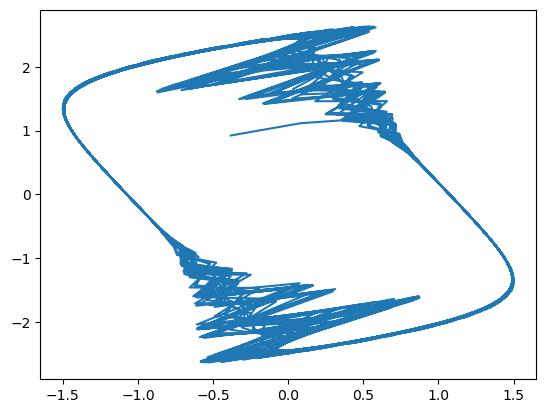

In [26]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=10
a=50
#b=100
theta=maths.pi/8
dt=0.005

def wave_generator(size,theta,a,c,dt,start=(0.,1.)):
    x_=np.zeros((size,))
    y_=np.zeros((size,))

    x_[0], y_[0] = start

    def bvp(x,y):
        x_d=c*(x-(x**3)/3 + y)
        xs=c*(1-x**2)*x_d - x
        #ys = -1* (x+b*y -a)/c
        ys=-x*a
        return xs, ys
    def rotate(x_,y_,theta):
        #rotate points
        for i in range(size):
            x_dot, y_dot=(x_[i],y_[i])
            d=maths.sqrt(x_dot**2 + y_dot**2)
            x_[i] = x_dot*maths.cos(theta) - y_dot*maths.sin(theta)
            y_[i] = y_dot*maths.cos(theta) + x_dot*maths.sin(theta)
        return x_,y_
    
    for i in range(size-1):
        x_dot, y_dot=bvp(x_[i],y_[i])
        x_[i + 1] = x_[i] + (x_dot * dt)
        y_[i + 1] = y_[i] + (y_dot * dt)
    
    #rotate
    x_,y_=rotate(x_,y_,theta)
    return x_,y_

wave_x,wave_y=wave_generator(size,theta,a,c,dt)

plt.plot(wave_x,wave_y)
plt.show()


Converting these points to vectors of movement takes the x-axis (using the pendulum idea). Is is visible that the wave is continous with smaller adjustments over time

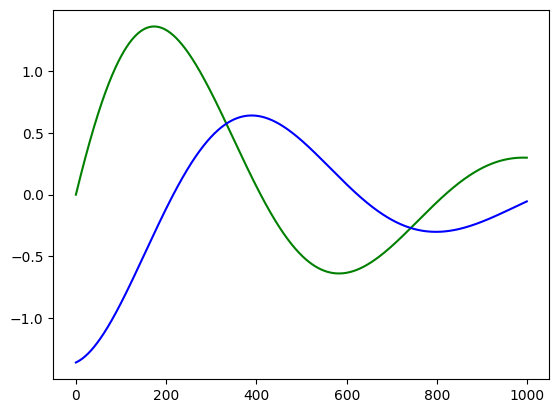

In [10]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=0.5
a=10
#b=100
theta=maths.pi/4
dt=0.005
#create
x_,y_=wave_generator(size,0,a,c,dt)
rotated_x,rotated_y=wave_generator(size,theta,a,c,dt)
#convert 
signal=convert_scale(x_,val=2)
signal2=convert_scale(rotated_x,val=2)
#show
plt.plot(signal,c="g")
plt.plot(signal2,c="b")
plt.show()

## Section 5

Using the bvp chaos signals to control the simulation. The first example makes use of a pre-generated signal with a grid-search method



C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:18: RuntimeWarning: overflow encountered in double_scalars
  x_d=c*(x-(x**3)/3 + y)
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:18: RuntimeWarning: invalid value encountered in double_scalars
  x_d=c*(x-(x**3)/3 + y)
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:19: RuntimeWarning: overflow encountered in double_scalars
  xs=c*(1-x**2)*x_d - x
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:27: RuntimeWarning: overflow encountered in double_scalars
  d=maths.sqrt(x_dot**2 + y_dot**2)


Reward sum: -57.65228418840301


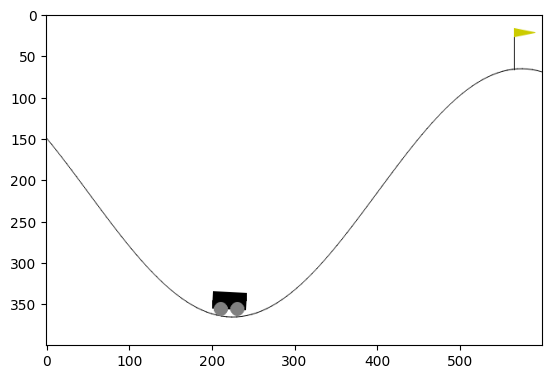

In [11]:
def fitness(observation): #get the fitness based on how far along the plane it is
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

GEN=500
best=-100
best_chaotic=None
#loop through diffrent parameters
for c in range(1,30):
    #c*=0.1
    for a in range(1,10):
        x_,y_=wave_generator(size,theta,a,c,dt,start=(0.,1.))
        geno=np.rint(convert(x_,val=2))
        #print(geno)
        reward,obs=run_trial(geno,GEN,show=False) #run a simulated trial
        reward=sum(obs)
        if reward>=best:
            best=reward
            best_chaotic=dc(geno) #deep copy the genotype
print("Reward sum:",best)
#reward=run_trial(best_chaotic,100)
im=visualise_best(best_chaotic,100)
plt.imshow(im)
plt.show()

## Section 6

Dynamical signal generation throughout a program


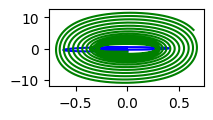

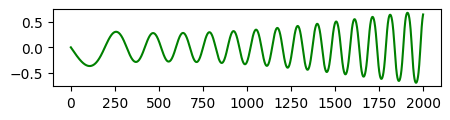

In [12]:
size=2000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=1
a=1
#b=100
theta=maths.pi/1
dt=0.005

x_=np.zeros((size,))
y_=np.zeros((size,))

x_[0], y_[0] = (0.,1.)

def bvp(x,y):
    x_d=c*(x-(x**3)/3 + y)
    xs=c*(1-x**2)*x_d - x
    #ys = -1* (x+b*y -a)/c
    ys=-x*a
    return xs, ys
def rotate(x_,y_,theta):
    #rotate points
    for i in range(size):
        x_dot, y_dot=(x_[i],y_[i])
        d=maths.sqrt(x_dot**2 + y_dot**2)
        x_[i] = x_dot*maths.cos(theta) - y_dot*maths.sin(theta)
        y_[i] = y_dot*maths.cos(theta) + x_dot*maths.sin(theta)
    return x_,y_
def wave_gen_step(x_,y_,i,theta,a,c,dt):
    x_dot, y_dot=bvp(x_[i],y_[i])
    x_[i + 1] = x_[i] + (x_dot * dt)
    y_[i + 1] = y_[i] + (y_dot * dt)
    #rotate
    x_,y_=rotate(x_,y_,theta)
    return x_,y_

wx,wy=wave_generator(size,theta,a,c,dt)
for i in range(size-1):
    x_,y_=wave_gen_step(x_,y_,i ,theta,a,c,dt)
    a+=0.1 #change values throughout the generation
plt.figure(figsize=(2,1))
plt.plot(wx,wy,"b")
plt.plot(x_,y_,"g")
plt.show()
plt.figure(figsize=(5,1))
plt.plot(x_,"g")
plt.show()
np.save("C:/Users/dexte/github/Chaos-Robotics/models/bvp_signal", x_)


Running via C++

This step requires the building of our c++ code. Within ```C++/BVP``` signal you will find the bvp_source.cpp This will need to be built using anaconda.

So the instructions are as follows:

You will need to install the pybind11 library for c++ and python

```pip install pybind11```

You will then want to have a directory of the source file .cpp and a setup.py file. I have attached examples of these files. 

Install anaconda for your local user. https://www.anaconda.com/products/distribution

Open x64 native tools command prompt on windows and navigate to the chosen directory of your code. For me that was 
```C:/users/dexte/source/repos/pytest```
Then type the command activate ```C:/Users/dexte/anaconda``` Of course, your username will be different. It should be stored in your user director if you have installed it correctly. 

Once this is done, within the directory of your code type the command: ```python setup.py develop``` this will build the file and now you can run python test.py to see if you have installed the library correctly


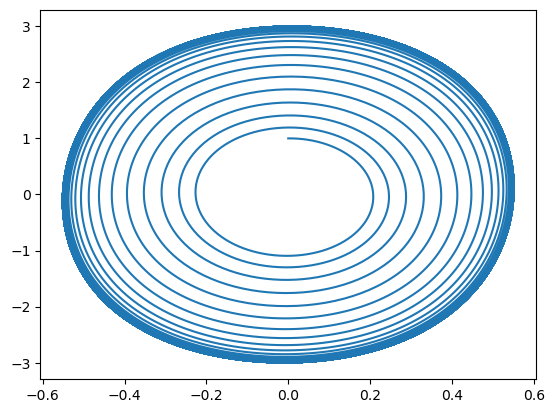

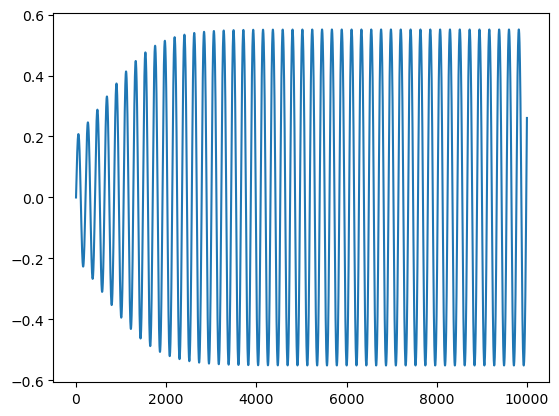

In [27]:
import bvp

class BVP:
    def __init__(self):
        self.b=bvp.BVP()
    def generate(self,size,a,c,dt):
        x=np.asarray(self.b.gen(size,c,a,dt)).view(np.float32)
        x=x.reshape(x.shape[0]//2,2)
        return x
a=30
c=1.1
dt=0.005
SIZE=10000

sig=BVP()
xy=sig.generate(SIZE,a,c,dt)
xs=xy[:,0]
ys=xy[:,1]
plt.plot(xs,ys)
plt.show()
plt.plot(xs)

plt.show()



## Section 7

CPG with modelled adaption is performed through a series of euqations. $\sigma$ represents the sigmoid activation function. Each x, output states, at time step t+1, we have the bias of the system $\theta$ and the sum of each weight from that neuron to the last input time step $x_{j,t}$. Added onto the end is $C^{p}_{i,t}$ where this acts as an extra bias.

$x_{i,t+1}=\sigma (\theta +\sum_{j=1}^{2}w_{ij}x_{j,t}+C^{p}_{i,t}), i\in {1,2}$

The bias term is calculated through sensory inputs, with the single parameter p (period). 

$C^{p}_{i,t}=\mu^{p}_{t} \sum_{j=1}^{2}w_{i,j}\Delta_{j,t}$

With the difference:

$\Delta_{j,t}=x_{j,t}-x_{j,(t-p)}$

$\mu^{p}_{t}$ represents the control strength at time step t and period p. The adaption rate is denoted by $\lambda$. The learning rate is initially set to 1/p. 

$\mu^{p}_{t+1}=\mu^{p}_{t}+\lambda \frac{\Delta^{2}_{1,t}+ \Delta^{2}_{2,t} }{p}$

The part of the equation with the deltas can be shown as the following:

$\frac{(x_{1,t}-x_{1,t-p})^2 + (x_{2,t}-x_{2,t-p})^2 }{p}$

This is so the positive values are taken with the squared, and finding the difference between x values. 



C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\1529033768.py:22: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-1*x)))
C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\1529033768.py:42: RuntimeWarning: overflow encountered in double_scalars
  mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p)


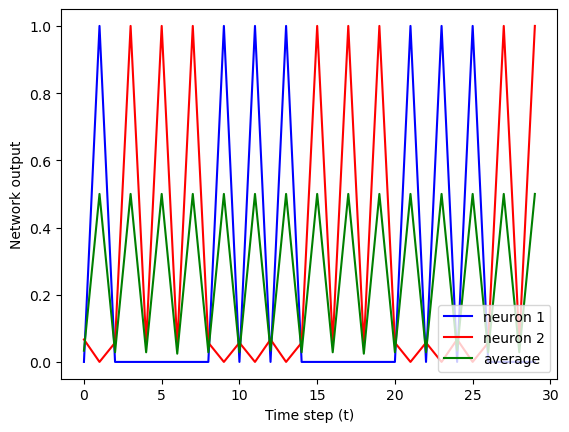

In [167]:
#implementing this with random generation
steps=631
lambda_=0.05
pp=[1,4,5,8,9]
p_count=1

mus=np.zeros((steps,))
mus[0]=-1
x=np.zeros((2,steps))
x[0][0]=1#random.randint(0,2)
x[1][0]=1#random.randint(0,2)
Cp=np.zeros((2,steps))
Cp[0][0]=1
Cp[1][0]=1
thetas= np.array([[-3.4],[3.8]])#np.random.normal(2,1.5,(2,1)) #bias terms
weights= np.array([[-22,5.6],[0,-6.6]]) #np.random.normal(2,1.5,(2,2))

outputs=np.zeros((2,steps))

def sigmoid(x):
    with np.errstate(invalid='ignore'):
        return (1/(1+np.exp(-1*x)))

def step(i,t,mus,Cp,x,j):
    global p_count
    p=pp[p_count]
    #apply mathematic formula

    mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p)
    Cp[i][t]=(mus[t])*((weights[i][i]*(x[i][t]-x[i][t-p]))+(weights[i][j]*(x[j][t]-x[j][t-p]))) 
    a=sigmoid(thetas[i]+(weights[i][i]*x[i][t])+(weights[i][j]*x[j][t])+Cp[i][t]) 
    x[i][t+1]=a
    return x
    
def step_e(i,t,x,j):
    global p_count
    global mus
    global Cp
    p=pp[p_count]
    #apply mathematic formula
    with np.errstate(invalid='ignore'):
        mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p) 
        Cp[:,t]=(mus[t])*np.sum(weights*(x[:,t]-x[:,t-p]),axis=1) 
    a=np.dot(weights,x[:,0])
    x[i][t+1]=sigmoid(thetas[i]+a[i]+Cp[i][t])
    x[j][t+1]=sigmoid(thetas[j]+a[j]+Cp[j][t])
    return x
t=1
for st in range(steps-2):
    #loop through the generation loop
    t=st+1
    x=step_e(0,t,x,1) 

plt.ylabel("Network output")
plt.xlabel("Time step (t)")
avg_out=np.average(x,axis=0)[:-1]

plt.plot(x[0][600:630],c="b",label="neuron 1")
#plt.plot(outputs[0][:-1],'bo')
plt.plot(x[1][600:630],c="r",label="neuron 2")
#plt.plot(outputs[1][:-1],'bo',c="r")
plt.plot(avg_out[600:630],c="g",label="average")
#plt.plot(avg_out,'bo',c="g")
plt.legend(loc="lower right")
plt.show()


C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\2086262373.py:22: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-1*x)))
C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\2086262373.py:40: RuntimeWarning: overflow encountered in double_scalars
  mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p)


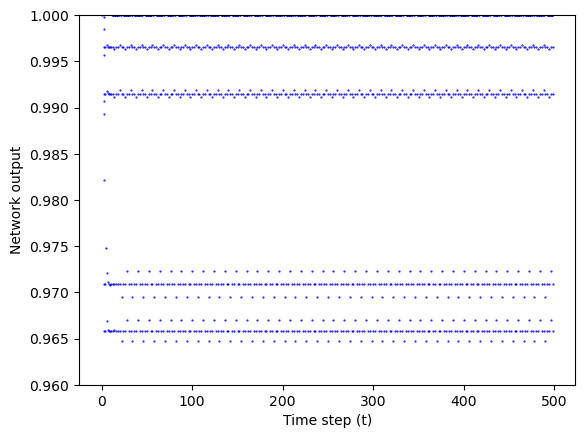

In [27]:
def run(steps,p,lambda_=0.05):
    global thetas
    global weights
    #generate all the arrays, weights and biases
    mus=np.zeros((steps,))
    mus[0]=-1
    x=np.zeros((2,steps))
    x[0][0]=random.randint(0,2)
    x[1][0]=random.randint(0,2)
    Cp=np.zeros((2,steps))
    Cp[0][0]=1
    Cp[1][0]=1
    thetas=np.random.normal(1,0.5,(2,1)) #bias terms
    weights=np.random.normal(1,0.5,(2,2))
    t=1
    for st in range(steps-2): #loop through steps
        t=st+1
        x=step_e(0,t,mus,Cp,x,1) #get neuron outputs
    avg_out=((x[0]+x[1])/2)[:-1] #get overall averages
    return avg_out,mus

plt.ylabel("Network output")
plt.xlabel("Time step (t)")
plt.ylim(0.96,1)
#[1,4,5,8,9]
l=0.05
avg_out,mus=run(500,1,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,2,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,3,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,4,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,5,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,6,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,7,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,8,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
avg_out,mus=run(500,9,lambda_=l)
plt.plot(avg_out,'bo',markersize=0.5)
plt.show()


Multiple neurons

C:\Users\dexte\AppData\Local\Temp\ipykernel_47108\1984366732.py:22: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-1*x)))
C:\Users\dexte\AppData\Local\Temp\ipykernel_47108\760719433.py:24: RuntimeWarning: overflow encountered in double_scalars
  mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p)


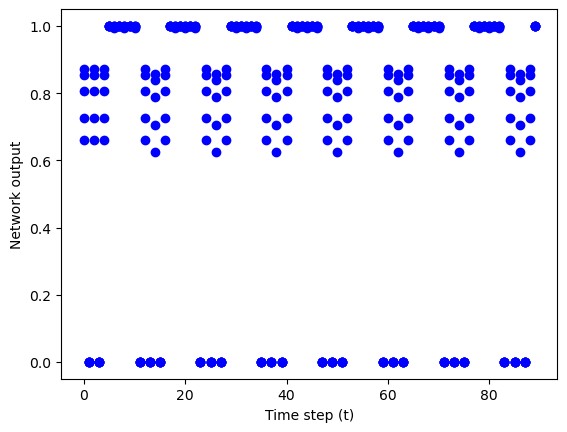

In [9]:
#implementing this with random generation
steps=631
lambda_=0.05
pp=[1,4,5,8,9]
p_count=1
num=5
mus=np.zeros((steps,))
mus[0]=-1
x=np.zeros((num,steps))
x[0][0]=random.randint(0,num)
x[1][0]=random.randint(0,num)
Cp=np.zeros((num,steps))
Cp[0][0]=1
Cp[1][0]=1
thetas=np.random.normal(1,0.5,(num,1)) #bias terms
weights=np.random.normal(1,0.5,(num,num))

outputs=np.zeros((2,steps))

def step_m(num,t,mus,Cp,x):
    global p_count
    p=pp[p_count]
    #apply mathematic formula
    mus[t+1]=(mus[t-1]**p)+lambda_*(((x[0][t-1]-x[0][t-1-p])**2+(x[1][t-1]-x[1][t-1-p])**2)/p)
    Cp[:,t]=(mus[t])*np.sum(weights*(x[:,t]-x[:,t-p]),axis=1)
    a=np.sum(weights*x[:,t],axis=1)
    for i in range(num):
        x[i][t+1]=sigmoid(thetas[i]+a[i]+Cp[i][t])
    return x
t=1
for st in range(steps-2):
    #loop through the generation loop
    t=st+1
    x=step_m(num,t,mus,Cp,x)

plt.ylabel("Network output")
plt.xlabel("Time step (t)")

avg_out=(np.sum(x,axis=0))/2
for i in range(len(x)):
    plt.plot(x[i][10:100],'bo')
#plt.plot(avg_out,'bo',c="g")

plt.show()


### Full neural curcuit

There should be an input, or series of inputs that goes through nueral preprocessing. This then defines the P value that is used within the adaptive neural chaos. The output of this is placed through a neural post processor that ends up in the neural motor control. 

C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\3171274758.py:26: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-1*x)))
C:\Users\dexte\AppData\Local\Temp\ipykernel_1836\3171274758.py:30: RuntimeWarning: overflow encountered in double_scalars
  self.mus[t+1]=(self.mus[t-1]**self.p)+self.lambda_*(((self.x[0][t-1]-self.x[0][t-1-self.p])**2+(self.x[1][t-1]-self.x[1][t-1-self.p])**2)/self.p)


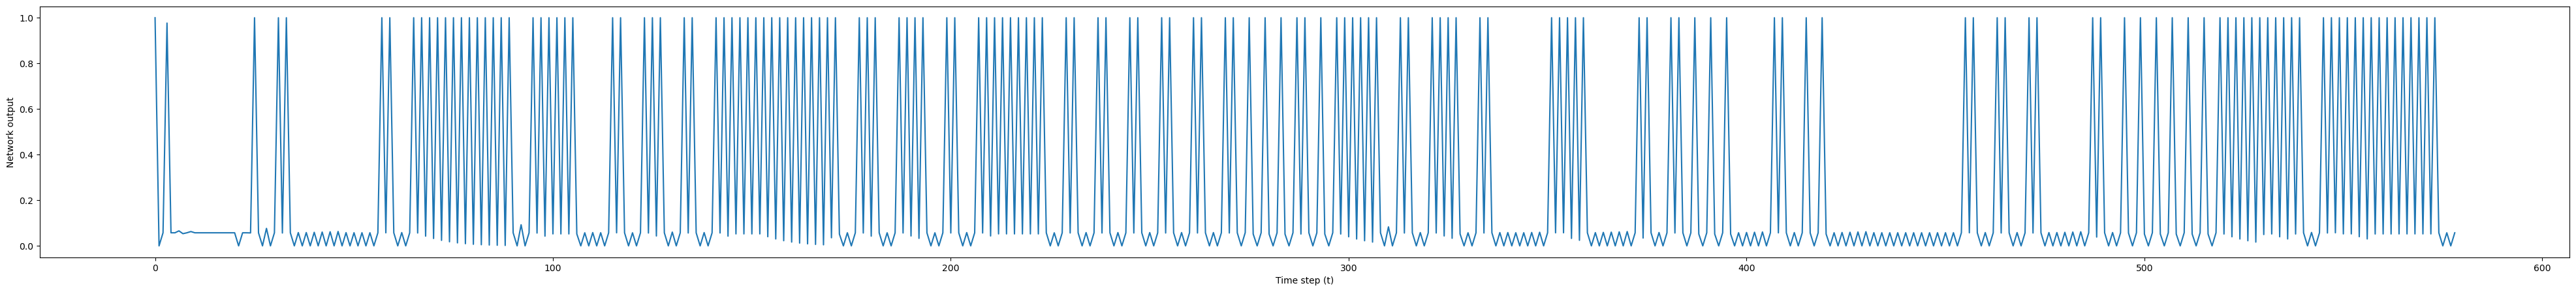

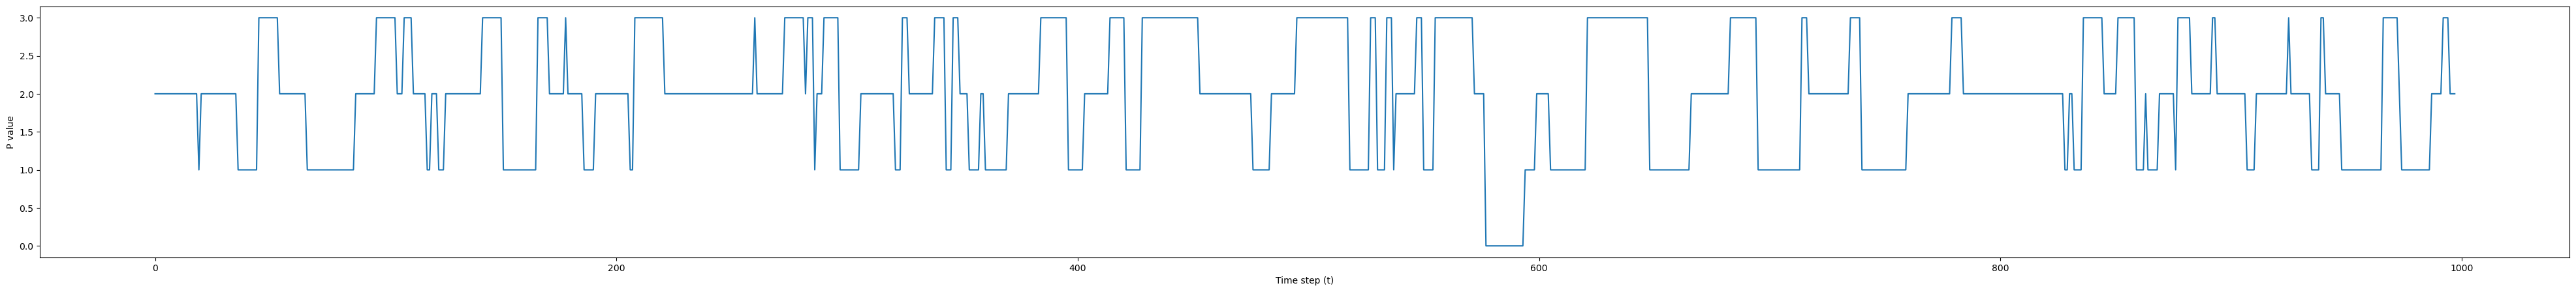

In [175]:
class Brain:
    def __init__(self,sensor_num,motor_num,lamda_=0.05,size=1000):
        #set up the inputs, cpg and output
        self.steps=size
        self.reset()
        self.lambda_=lamda_
        self.p=1 #initial value
        self.sensors=sensor_num
        self.outputs=motor_num
        self.post_process_bias=np.array([-0.5,-0.6])
        self.in_nuerons_weights=np.random.random((sensor_num,2))    
    def reset(self):
        self.mus=np.zeros((self.steps,))
        self.mus[0]=-1
        self.Cp=np.zeros((2,self.steps))
        self.Cp[0][0]=1
        self.Cp[1][0]=1
        self.x=np.zeros((2,self.steps))
        self.x[0][0]=1#random.randint(0,2)
        self.x[1][0]=1#random.randint(0,2)
        self.thetas= np.array([[-3.4],[3.8]])#np.random.normal(2,1.5,(2,1)) #bias terms
        self.weights= np.array([[-22,5.6],[0,-6.6]]) #np.random.normal(2,1.5,(2,2))
        self.t=0
    def sigmoid(self,x):
        with np.errstate(invalid='ignore'):
            return (1/(1+np.exp(-1*x)))
    def step(self,t):
        #apply mathematic formula to make a step
        with np.errstate(invalid='ignore'):
            self.mus[t+1]=(self.mus[t-1]**self.p)+self.lambda_*(((self.x[0][t-1]-self.x[0][t-1-self.p])**2+(self.x[1][t-1]-self.x[1][t-1-self.p])**2)/self.p) 
            self.Cp[:,t]=(self.mus[t])*np.sum(self.weights*(self.x[:,t]-self.x[:,t-self.p]),axis=1) 
        a=np.dot(self.weights,self.x[:,0])
        self.x[0][t+1]=self.sigmoid(self.thetas[0]+a[0]+self.Cp[0][t])
        self.x[1][t+1]=self.sigmoid(self.thetas[1]+a[1]+self.Cp[1][t])
    def A(self,inputs):
        #run neural preprocessing on inputs and generate p value
        out=self.in_nuerons_weights.T*inputs
        return round(np.sum(out))
    def run(self,inputs): #take in inputs and produce outputs
        assert len(inputs)==self.sensors,"incorrect sizing of inputs"
        self.p=self.A(inputs) #run preprocessing
        self.t+=1
        self.step(self.t)
        #neural post processing
        out=self.x[:,self.t+1] #+ self.post_process_bias #get summed outputs of step
        self.out=out
        #place through neural post processing
        #send to motors

b=Brain(3,2,size=1000)
d=[]
ps=[]
inputs=np.random.random(3)
for i in range(b.steps-2):
    if random.random()<0.2: #randomly change the inputs
        inputs=np.random.random(3)
    b.run(inputs)
    d.append(b.out)
    ps.append(b.p)

plt.figure(figsize=(50,5))
plt.ylabel("Network output")
plt.xlabel("Time step (t)")
plt.plot(b.x[1])
plt.show()

plt.figure(figsize=(50,5))
plt.ylabel("P value")
plt.xlabel("Time step (t)")
plt.plot(ps)
plt.show()

## Section 8

Playing with genetic algorithms

In [168]:

steps=10

def generateGenotype(steps):
    genotype=np.array([random.randint(1,9) for i in range(steps)])
    new_geno=np.zeros((steps**2,))
    #count differences
    diff=(np.diff(genotype)!=0).sum()
    #steps*=100 #increase overall size
    for i in range(len(genotype)):
        avg_out,mus=run(steps,genotype[i],lambda_=l)
        new_geno[steps*i:min(steps+steps*i -1,len(new_geno)-1)]=avg_out[0:steps-1]
    return genotype,new_geno,convertDecision(new_geno)

def convertDecision(signal):
    #make threshold with val and create a signal based off of the chaotic one
    if np.max(signal)>1:
        signal/=np.max(signal)
    new=np.zeros(signal.shape)
    new[np.argwhere(signal<=(0.3))]=0
    new[np.argwhere(signal>(0.3))]=1
    new[np.argwhere(signal>0.6)]=2 #set by threshold
    return new

genotype,new_geno,decision=generateGenotype(steps)
plt.plot(new_geno[0:500])
decision=convertDecision(new_geno[0:500])
#plt.plot(decision)
plt.show()
genotype=decision.reshape((decision.shape[0],1))
c=visualise_best(genotype,len(genotype))
plt.imshow(c)
plt.show()


TypeError: step_e() takes 4 positional arguments but 6 were given